## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.93041 | train_mse: 0.57618 | train_mae: 0.62231 |  0:00:00s


epoch 1  | loss: 0.28611 | train_mse: 0.63071 | train_mae: 0.56869 |  0:00:01s


epoch 2  | loss: 0.20754 | train_mse: 0.42848 | train_mae: 0.47121 |  0:00:01s


epoch 3  | loss: 0.22624 | train_mse: 0.17793 | train_mae: 0.31718 |  0:00:02s


epoch 4  | loss: 0.1839  | train_mse: 0.18935 | train_mae: 0.3249  |  0:00:02s


epoch 5  | loss: 0.14811 | train_mse: 0.17899 | train_mae: 0.32466 |  0:00:03s


epoch 6  | loss: 0.14132 | train_mse: 0.17557 | train_mae: 0.30011 |  0:00:03s


epoch 7  | loss: 0.14242 | train_mse: 0.10362 | train_mae: 0.24397 |  0:00:04s


epoch 8  | loss: 0.1211  | train_mse: 0.09363 | train_mae: 0.23265 |  0:00:04s


epoch 9  | loss: 0.12239 | train_mse: 0.09213 | train_mae: 0.23819 |  0:00:05s


epoch 10 | loss: 0.11759 | train_mse: 0.10453 | train_mae: 0.26033 |  0:00:06s


epoch 11 | loss: 0.09911 | train_mse: 0.07902 | train_mae: 0.20129 |  0:00:06s


epoch 12 | loss: 0.10094 | train_mse: 0.06442 | train_mae: 0.19105 |  0:00:07s


epoch 13 | loss: 0.08901 | train_mse: 0.05237 | train_mae: 0.17746 |  0:00:07s


epoch 14 | loss: 0.07334 | train_mse: 0.04685 | train_mae: 0.16308 |  0:00:08s


epoch 15 | loss: 0.07807 | train_mse: 0.06167 | train_mae: 0.18988 |  0:00:08s


epoch 16 | loss: 0.08694 | train_mse: 0.0655  | train_mae: 0.19637 |  0:00:09s


epoch 17 | loss: 0.08307 | train_mse: 0.06419 | train_mae: 0.19349 |  0:00:09s


epoch 18 | loss: 0.08083 | train_mse: 0.05556 | train_mae: 0.17945 |  0:00:10s


epoch 19 | loss: 0.07455 | train_mse: 0.0449  | train_mae: 0.17436 |  0:00:10s


epoch 20 | loss: 0.07576 | train_mse: 0.05166 | train_mae: 0.17284 |  0:00:11s


epoch 21 | loss: 0.05905 | train_mse: 0.03372 | train_mae: 0.14054 |  0:00:11s


epoch 22 | loss: 0.06799 | train_mse: 0.03911 | train_mae: 0.14073 |  0:00:12s


epoch 23 | loss: 0.07661 | train_mse: 0.0388  | train_mae: 0.15532 |  0:00:13s


epoch 24 | loss: 0.0609  | train_mse: 0.05306 | train_mae: 0.17965 |  0:00:13s


epoch 25 | loss: 0.07587 | train_mse: 0.0471  | train_mae: 0.16706 |  0:00:14s


epoch 26 | loss: 0.06331 | train_mse: 0.0325  | train_mae: 0.13825 |  0:00:15s


epoch 27 | loss: 0.08149 | train_mse: 0.0293  | train_mae: 0.12809 |  0:00:15s


epoch 28 | loss: 0.06181 | train_mse: 0.02919 | train_mae: 0.12217 |  0:00:16s


epoch 29 | loss: 0.06439 | train_mse: 0.04824 | train_mae: 0.14521 |  0:00:16s


epoch 30 | loss: 0.08701 | train_mse: 0.05078 | train_mae: 0.17387 |  0:00:17s


epoch 31 | loss: 0.07694 | train_mse: 0.02901 | train_mae: 0.13684 |  0:00:17s


epoch 32 | loss: 0.05668 | train_mse: 0.03486 | train_mae: 0.14759 |  0:00:18s


epoch 33 | loss: 0.08517 | train_mse: 0.03065 | train_mae: 0.13309 |  0:00:18s


epoch 34 | loss: 0.06757 | train_mse: 0.02276 | train_mae: 0.11614 |  0:00:19s


epoch 35 | loss: 0.05889 | train_mse: 0.03093 | train_mae: 0.12969 |  0:00:19s


epoch 36 | loss: 0.05574 | train_mse: 0.02473 | train_mae: 0.11932 |  0:00:20s


epoch 37 | loss: 0.07082 | train_mse: 0.05574 | train_mae: 0.17179 |  0:00:20s


epoch 38 | loss: 0.08346 | train_mse: 0.03906 | train_mae: 0.15712 |  0:00:21s


epoch 39 | loss: 0.07396 | train_mse: 0.04754 | train_mae: 0.17854 |  0:00:21s


epoch 40 | loss: 0.05885 | train_mse: 0.04292 | train_mae: 0.16505 |  0:00:22s


epoch 41 | loss: 0.04398 | train_mse: 0.04757 | train_mae: 0.17766 |  0:00:23s


epoch 42 | loss: 0.05754 | train_mse: 0.03461 | train_mae: 0.14616 |  0:00:23s


epoch 43 | loss: 0.05125 | train_mse: 0.02326 | train_mae: 0.11663 |  0:00:24s


epoch 44 | loss: 0.07081 | train_mse: 0.03547 | train_mae: 0.14062 |  0:00:24s


epoch 45 | loss: 0.04441 | train_mse: 0.02606 | train_mae: 0.12131 |  0:00:25s


epoch 46 | loss: 0.04549 | train_mse: 0.02482 | train_mae: 0.11818 |  0:00:25s


epoch 47 | loss: 0.05367 | train_mse: 0.01867 | train_mae: 0.10333 |  0:00:26s


epoch 48 | loss: 0.04448 | train_mse: 0.02584 | train_mae: 0.1248  |  0:00:26s


epoch 49 | loss: 0.05805 | train_mse: 0.0395  | train_mae: 0.1446  |  0:00:27s


epoch 50 | loss: 0.05624 | train_mse: 0.02706 | train_mae: 0.1282  |  0:00:28s


epoch 51 | loss: 0.05077 | train_mse: 0.02335 | train_mae: 0.1153  |  0:00:28s


epoch 52 | loss: 0.08598 | train_mse: 0.03144 | train_mae: 0.14365 |  0:00:29s


epoch 53 | loss: 0.0492  | train_mse: 0.03099 | train_mae: 0.13681 |  0:00:29s


epoch 54 | loss: 0.06048 | train_mse: 0.02591 | train_mae: 0.12935 |  0:00:30s


epoch 55 | loss: 0.05806 | train_mse: 0.02728 | train_mae: 0.13385 |  0:00:30s


epoch 56 | loss: 0.04088 | train_mse: 0.07101 | train_mae: 0.15584 |  0:00:31s


epoch 57 | loss: 0.04454 | train_mse: 0.02775 | train_mae: 0.1175  |  0:00:31s


epoch 58 | loss: 0.03807 | train_mse: 0.03701 | train_mae: 0.13585 |  0:00:32s


epoch 59 | loss: 0.04422 | train_mse: 0.01873 | train_mae: 0.09966 |  0:00:32s


epoch 60 | loss: 0.04093 | train_mse: 0.02292 | train_mae: 0.1124  |  0:00:33s


epoch 61 | loss: 0.04406 | train_mse: 0.02152 | train_mae: 0.10823 |  0:00:33s


epoch 62 | loss: 0.04798 | train_mse: 0.03466 | train_mae: 0.13516 |  0:00:34s


epoch 63 | loss: 0.05148 | train_mse: 0.03248 | train_mae: 0.11385 |  0:00:34s


epoch 64 | loss: 0.05116 | train_mse: 0.02611 | train_mae: 0.12426 |  0:00:35s


epoch 65 | loss: 0.04976 | train_mse: 0.02733 | train_mae: 0.12099 |  0:00:36s


epoch 66 | loss: 0.04592 | train_mse: 0.0336  | train_mae: 0.14293 |  0:00:37s


epoch 67 | loss: 0.04502 | train_mse: 0.01655 | train_mae: 0.09524 |  0:00:38s


epoch 68 | loss: 0.05812 | train_mse: 0.01987 | train_mae: 0.10406 |  0:00:39s


epoch 69 | loss: 0.03292 | train_mse: 0.01627 | train_mae: 0.09944 |  0:00:40s


epoch 70 | loss: 0.06171 | train_mse: 0.01776 | train_mae: 0.1003  |  0:00:41s


epoch 71 | loss: 0.04358 | train_mse: 0.0157  | train_mae: 0.09805 |  0:00:41s


epoch 72 | loss: 0.04186 | train_mse: 0.01967 | train_mae: 0.106   |  0:00:42s


epoch 73 | loss: 0.03692 | train_mse: 0.01369 | train_mae: 0.08688 |  0:00:42s


epoch 74 | loss: 0.04069 | train_mse: 0.01518 | train_mae: 0.09369 |  0:00:43s


epoch 75 | loss: 0.03269 | train_mse: 0.02142 | train_mae: 0.11013 |  0:00:43s


epoch 76 | loss: 0.04155 | train_mse: 0.02243 | train_mae: 0.11052 |  0:00:44s


epoch 77 | loss: 0.0522  | train_mse: 0.01328 | train_mae: 0.0867  |  0:00:45s


epoch 78 | loss: 0.0511  | train_mse: 0.01933 | train_mae: 0.11058 |  0:00:45s


epoch 79 | loss: 0.04    | train_mse: 0.01456 | train_mae: 0.08944 |  0:00:46s


epoch 80 | loss: 0.03521 | train_mse: 0.01521 | train_mae: 0.09972 |  0:00:46s


epoch 81 | loss: 0.02734 | train_mse: 0.01354 | train_mae: 0.0874  |  0:00:47s


epoch 82 | loss: 0.03528 | train_mse: 0.01206 | train_mae: 0.08621 |  0:00:47s


epoch 83 | loss: 0.03583 | train_mse: 0.02972 | train_mae: 0.129   |  0:00:48s


epoch 84 | loss: 0.03879 | train_mse: 0.01432 | train_mae: 0.09942 |  0:00:48s


epoch 85 | loss: 0.0339  | train_mse: 0.0134  | train_mae: 0.09227 |  0:00:49s


epoch 86 | loss: 0.03518 | train_mse: 0.01769 | train_mae: 0.10002 |  0:00:49s


epoch 87 | loss: 0.03722 | train_mse: 0.01188 | train_mae: 0.0854  |  0:00:50s


epoch 88 | loss: 0.03474 | train_mse: 0.01457 | train_mae: 0.0892  |  0:00:51s


epoch 89 | loss: 0.04866 | train_mse: 0.0156  | train_mae: 0.09477 |  0:00:51s


epoch 90 | loss: 0.0321  | train_mse: 0.04207 | train_mae: 0.12905 |  0:00:52s


epoch 91 | loss: 0.04466 | train_mse: 0.03529 | train_mae: 0.1218  |  0:00:52s


epoch 92 | loss: 0.03847 | train_mse: 0.0208  | train_mae: 0.10007 |  0:00:53s


epoch 93 | loss: 0.03504 | train_mse: 0.03304 | train_mae: 0.14306 |  0:00:53s


epoch 94 | loss: 0.03173 | train_mse: 0.04185 | train_mae: 0.15362 |  0:00:54s


epoch 95 | loss: 0.04117 | train_mse: 0.02598 | train_mae: 0.10887 |  0:00:54s


epoch 96 | loss: 0.03939 | train_mse: 0.02629 | train_mae: 0.12074 |  0:00:55s


epoch 97 | loss: 0.03727 | train_mse: 0.11488 | train_mae: 0.1994  |  0:00:55s


epoch 98 | loss: 0.06173 | train_mse: 0.04776 | train_mae: 0.16022 |  0:00:56s


epoch 99 | loss: 0.05558 | train_mse: 0.01918 | train_mae: 0.11593 |  0:00:56s


epoch 100| loss: 0.04553 | train_mse: 0.03511 | train_mae: 0.1364  |  0:00:57s


epoch 101| loss: 0.05033 | train_mse: 0.03412 | train_mae: 0.12457 |  0:00:57s


epoch 102| loss: 0.04239 | train_mse: 0.01741 | train_mae: 0.09865 |  0:00:58s


epoch 103| loss: 0.03667 | train_mse: 0.04363 | train_mae: 0.15297 |  0:00:58s


epoch 104| loss: 0.03963 | train_mse: 0.01601 | train_mae: 0.09731 |  0:01:00s


epoch 105| loss: 0.02959 | train_mse: 0.00831 | train_mae: 0.06985 |  0:01:00s


epoch 106| loss: 0.03019 | train_mse: 0.0125  | train_mae: 0.08918 |  0:01:01s


epoch 107| loss: 0.03951 | train_mse: 0.05023 | train_mae: 0.17926 |  0:01:01s


epoch 108| loss: 0.05269 | train_mse: 0.03497 | train_mae: 0.14448 |  0:01:02s


epoch 109| loss: 0.05495 | train_mse: 0.10046 | train_mae: 0.17305 |  0:01:02s


epoch 110| loss: 0.07903 | train_mse: 0.037   | train_mae: 0.14336 |  0:01:03s


epoch 111| loss: 0.0621  | train_mse: 0.01943 | train_mae: 0.10346 |  0:01:03s


epoch 112| loss: 0.04599 | train_mse: 0.02371 | train_mae: 0.11348 |  0:01:04s


epoch 113| loss: 0.03693 | train_mse: 0.01249 | train_mae: 0.08776 |  0:01:05s


epoch 114| loss: 0.03558 | train_mse: 0.01742 | train_mae: 0.09535 |  0:01:05s


epoch 115| loss: 0.02996 | train_mse: 0.01403 | train_mae: 0.08928 |  0:01:06s


epoch 116| loss: 0.03468 | train_mse: 0.0223  | train_mae: 0.11102 |  0:01:06s


epoch 117| loss: 0.03955 | train_mse: 0.02776 | train_mae: 0.11382 |  0:01:07s


epoch 118| loss: 0.05358 | train_mse: 0.02497 | train_mae: 0.11154 |  0:01:07s


epoch 119| loss: 0.03647 | train_mse: 0.01905 | train_mae: 0.09437 |  0:01:08s


epoch 120| loss: 0.06007 | train_mse: 0.04283 | train_mae: 0.13542 |  0:01:08s


epoch 121| loss: 0.07053 | train_mse: 0.03076 | train_mae: 0.11421 |  0:01:09s


epoch 122| loss: 0.03916 | train_mse: 0.02172 | train_mae: 0.11656 |  0:01:09s


epoch 123| loss: 0.03549 | train_mse: 0.01166 | train_mae: 0.08016 |  0:01:10s


epoch 124| loss: 0.07124 | train_mse: 0.01452 | train_mae: 0.09149 |  0:01:10s


epoch 125| loss: 0.05907 | train_mse: 0.0139  | train_mae: 0.08987 |  0:01:11s


epoch 126| loss: 0.0293  | train_mse: 0.01192 | train_mae: 0.0872  |  0:01:11s


epoch 127| loss: 0.02722 | train_mse: 0.01185 | train_mae: 0.08438 |  0:01:12s


epoch 128| loss: 0.05164 | train_mse: 0.01312 | train_mae: 0.08431 |  0:01:12s


epoch 129| loss: 0.03283 | train_mse: 0.01959 | train_mae: 0.10357 |  0:01:13s


epoch 130| loss: 0.0601  | train_mse: 0.01753 | train_mae: 0.09014 |  0:01:13s


epoch 131| loss: 0.02915 | train_mse: 0.01182 | train_mae: 0.07677 |  0:01:14s


epoch 132| loss: 0.03387 | train_mse: 0.01518 | train_mae: 0.08902 |  0:01:14s


epoch 133| loss: 0.02337 | train_mse: 0.01248 | train_mae: 0.0801  |  0:01:15s


epoch 134| loss: 0.03477 | train_mse: 0.01456 | train_mae: 0.09052 |  0:01:15s


epoch 135| loss: 0.02546 | train_mse: 0.01181 | train_mae: 0.07536 |  0:01:16s


epoch 136| loss: 0.02943 | train_mse: 0.00962 | train_mae: 0.076   |  0:01:17s


epoch 137| loss: 0.03417 | train_mse: 0.0104  | train_mae: 0.07996 |  0:01:17s


epoch 138| loss: 0.02918 | train_mse: 0.00991 | train_mae: 0.06883 |  0:01:18s


epoch 139| loss: 0.02392 | train_mse: 0.01499 | train_mae: 0.08287 |  0:01:18s


epoch 140| loss: 0.02771 | train_mse: 0.02339 | train_mae: 0.10968 |  0:01:19s


epoch 141| loss: 0.04125 | train_mse: 0.01428 | train_mae: 0.08127 |  0:01:19s


epoch 142| loss: 0.03538 | train_mse: 0.01148 | train_mae: 0.07891 |  0:01:20s


epoch 143| loss: 0.02615 | train_mse: 0.00806 | train_mae: 0.06952 |  0:01:20s


epoch 144| loss: 0.04922 | train_mse: 0.02661 | train_mae: 0.1281  |  0:01:21s


epoch 145| loss: 0.03858 | train_mse: 0.02315 | train_mae: 0.11765 |  0:01:21s


epoch 146| loss: 0.03563 | train_mse: 0.01247 | train_mae: 0.08884 |  0:01:22s


epoch 147| loss: 0.04549 | train_mse: 0.0179  | train_mae: 0.09569 |  0:01:23s


epoch 148| loss: 0.04156 | train_mse: 0.01087 | train_mae: 0.07947 |  0:01:23s


epoch 149| loss: 0.03169 | train_mse: 0.01456 | train_mae: 0.08523 |  0:01:24s


epoch 150| loss: 0.04831 | train_mse: 0.05178 | train_mae: 0.1487  |  0:01:24s


epoch 151| loss: 0.03499 | train_mse: 0.02063 | train_mae: 0.10193 |  0:01:25s


epoch 152| loss: 0.04008 | train_mse: 0.03631 | train_mae: 0.13244 |  0:01:25s


epoch 153| loss: 0.04511 | train_mse: 0.02111 | train_mae: 0.104   |  0:01:26s


epoch 154| loss: 0.04597 | train_mse: 0.02022 | train_mae: 0.10343 |  0:01:26s


epoch 155| loss: 0.03395 | train_mse: 0.04172 | train_mae: 0.14342 |  0:01:27s


epoch 156| loss: 0.03314 | train_mse: 0.01422 | train_mae: 0.0929  |  0:01:27s


epoch 157| loss: 0.05201 | train_mse: 0.04826 | train_mae: 0.15269 |  0:01:28s


epoch 158| loss: 0.02803 | train_mse: 0.01866 | train_mae: 0.09418 |  0:01:28s


epoch 159| loss: 0.02674 | train_mse: 0.01455 | train_mae: 0.08851 |  0:01:29s


epoch 160| loss: 0.02538 | train_mse: 0.01089 | train_mae: 0.07869 |  0:01:29s


epoch 161| loss: 0.03696 | train_mse: 0.01377 | train_mae: 0.07699 |  0:01:30s


epoch 162| loss: 0.03864 | train_mse: 0.0171  | train_mae: 0.09227 |  0:01:31s


epoch 163| loss: 0.02437 | train_mse: 0.01887 | train_mae: 0.10971 |  0:01:31s


epoch 164| loss: 0.03648 | train_mse: 0.02295 | train_mae: 0.10831 |  0:01:32s


epoch 165| loss: 0.0312  | train_mse: 0.0122  | train_mae: 0.08306 |  0:01:32s


epoch 166| loss: 0.03338 | train_mse: 0.01572 | train_mae: 0.08954 |  0:01:33s


epoch 167| loss: 0.04646 | train_mse: 0.01979 | train_mae: 0.09154 |  0:01:33s


epoch 168| loss: 0.06725 | train_mse: 0.02297 | train_mae: 0.11653 |  0:01:34s


epoch 169| loss: 0.05816 | train_mse: 0.01191 | train_mae: 0.08042 |  0:01:34s


epoch 170| loss: 0.0403  | train_mse: 0.01871 | train_mae: 0.09991 |  0:01:35s


epoch 171| loss: 0.05476 | train_mse: 0.01993 | train_mae: 0.0903  |  0:01:35s


epoch 172| loss: 0.04532 | train_mse: 0.01116 | train_mae: 0.07888 |  0:01:36s


epoch 173| loss: 0.03609 | train_mse: 0.01068 | train_mae: 0.07583 |  0:01:36s


epoch 174| loss: 0.03853 | train_mse: 0.01721 | train_mae: 0.10926 |  0:01:37s


epoch 175| loss: 0.03602 | train_mse: 0.01312 | train_mae: 0.08309 |  0:01:37s


epoch 176| loss: 0.02797 | train_mse: 0.01688 | train_mae: 0.09185 |  0:01:38s


epoch 177| loss: 0.02993 | train_mse: 0.01709 | train_mae: 0.08499 |  0:01:38s


epoch 178| loss: 0.02592 | train_mse: 0.01102 | train_mae: 0.08073 |  0:01:39s


epoch 179| loss: 0.02125 | train_mse: 0.01153 | train_mae: 0.07459 |  0:01:39s


epoch 180| loss: 0.02619 | train_mse: 0.00984 | train_mae: 0.07581 |  0:01:40s


epoch 181| loss: 0.02606 | train_mse: 0.00797 | train_mae: 0.06905 |  0:01:40s


epoch 182| loss: 0.02641 | train_mse: 0.00797 | train_mae: 0.0643  |  0:01:41s


epoch 183| loss: 0.02251 | train_mse: 0.01353 | train_mae: 0.08353 |  0:01:42s


epoch 184| loss: 0.02995 | train_mse: 0.0113  | train_mae: 0.07469 |  0:01:42s


epoch 185| loss: 0.02747 | train_mse: 0.01485 | train_mae: 0.08856 |  0:01:43s


epoch 186| loss: 0.02593 | train_mse: 0.02289 | train_mae: 0.11668 |  0:01:43s


epoch 187| loss: 0.05909 | train_mse: 0.03071 | train_mae: 0.12466 |  0:01:44s


epoch 188| loss: 0.04426 | train_mse: 0.02903 | train_mae: 0.1239  |  0:01:44s


epoch 189| loss: 0.0474  | train_mse: 0.03073 | train_mae: 0.13126 |  0:01:45s


epoch 190| loss: 0.04533 | train_mse: 0.01871 | train_mae: 0.10401 |  0:01:45s


epoch 191| loss: 0.03737 | train_mse: 0.02386 | train_mae: 0.10868 |  0:01:46s


epoch 192| loss: 0.02702 | train_mse: 0.01269 | train_mae: 0.08221 |  0:01:46s


epoch 193| loss: 0.03716 | train_mse: 0.02509 | train_mae: 0.11328 |  0:01:47s


epoch 194| loss: 0.03934 | train_mse: 0.01978 | train_mae: 0.10422 |  0:01:47s


epoch 195| loss: 0.04225 | train_mse: 0.01437 | train_mae: 0.08594 |  0:01:48s


epoch 196| loss: 0.0369  | train_mse: 0.01602 | train_mae: 0.0953  |  0:01:48s


epoch 197| loss: 0.02374 | train_mse: 0.02209 | train_mae: 0.10349 |  0:01:49s


epoch 198| loss: 0.03264 | train_mse: 0.02053 | train_mae: 0.10805 |  0:01:49s


epoch 199| loss: 0.03273 | train_mse: 0.01357 | train_mae: 0.09054 |  0:01:50s


epoch 200| loss: 0.02773 | train_mse: 0.01234 | train_mae: 0.08098 |  0:01:50s


epoch 201| loss: 0.0295  | train_mse: 0.02437 | train_mae: 0.11331 |  0:01:51s


epoch 202| loss: 0.02746 | train_mse: 0.02064 | train_mae: 0.11963 |  0:01:51s


epoch 203| loss: 0.03356 | train_mse: 0.01867 | train_mae: 0.10739 |  0:01:52s


epoch 204| loss: 0.02356 | train_mse: 0.01566 | train_mae: 0.0854  |  0:01:52s


epoch 205| loss: 0.02559 | train_mse: 0.01203 | train_mae: 0.08545 |  0:01:53s


epoch 206| loss: 0.03588 | train_mse: 0.01511 | train_mae: 0.08399 |  0:01:53s


epoch 207| loss: 0.02415 | train_mse: 0.00812 | train_mae: 0.06662 |  0:01:54s


epoch 208| loss: 0.02134 | train_mse: 0.00846 | train_mae: 0.07022 |  0:01:55s


epoch 209| loss: 0.0253  | train_mse: 0.01365 | train_mae: 0.08638 |  0:01:55s


epoch 210| loss: 0.02693 | train_mse: 0.03129 | train_mae: 0.11395 |  0:01:56s


epoch 211| loss: 0.04509 | train_mse: 0.01494 | train_mae: 0.09377 |  0:01:56s


epoch 212| loss: 0.0288  | train_mse: 0.01663 | train_mae: 0.08963 |  0:01:57s


epoch 213| loss: 0.01905 | train_mse: 0.00894 | train_mae: 0.06983 |  0:01:57s


epoch 214| loss: 0.0239  | train_mse: 0.02161 | train_mae: 0.10272 |  0:01:58s


epoch 215| loss: 0.02456 | train_mse: 0.0104  | train_mae: 0.07842 |  0:01:58s


epoch 216| loss: 0.02518 | train_mse: 0.0219  | train_mae: 0.09879 |  0:01:59s


epoch 217| loss: 0.02676 | train_mse: 0.01967 | train_mae: 0.09856 |  0:01:59s


epoch 218| loss: 0.03545 | train_mse: 0.01603 | train_mae: 0.09146 |  0:02:00s


epoch 219| loss: 0.02614 | train_mse: 0.01709 | train_mae: 0.09275 |  0:02:00s


epoch 220| loss: 0.02907 | train_mse: 0.01024 | train_mae: 0.07642 |  0:02:01s


epoch 221| loss: 0.02436 | train_mse: 0.01338 | train_mae: 0.08359 |  0:02:01s


epoch 222| loss: 0.03125 | train_mse: 0.01677 | train_mae: 0.09092 |  0:02:02s


epoch 223| loss: 0.03904 | train_mse: 0.02553 | train_mae: 0.12042 |  0:02:02s


epoch 224| loss: 0.03268 | train_mse: 0.01112 | train_mae: 0.07568 |  0:02:03s


epoch 225| loss: 0.02857 | train_mse: 0.0137  | train_mae: 0.08444 |  0:02:03s


epoch 226| loss: 0.03413 | train_mse: 0.0181  | train_mae: 0.09926 |  0:02:04s


epoch 227| loss: 0.02217 | train_mse: 0.03203 | train_mae: 0.12782 |  0:02:04s


epoch 228| loss: 0.02846 | train_mse: 0.01221 | train_mae: 0.08741 |  0:02:05s


epoch 229| loss: 0.02566 | train_mse: 0.01181 | train_mae: 0.07738 |  0:02:06s


epoch 230| loss: 0.02954 | train_mse: 0.01449 | train_mae: 0.08762 |  0:02:06s


epoch 231| loss: 0.0355  | train_mse: 0.03256 | train_mae: 0.12502 |  0:02:07s


epoch 232| loss: 0.03154 | train_mse: 0.01805 | train_mae: 0.10163 |  0:02:07s

Early stopping occurred at epoch 232 with best_epoch = 182 and best_train_mae = 0.0643
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.0626252616222702


ABC Pre-generator MAE 0.7765406816204175


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

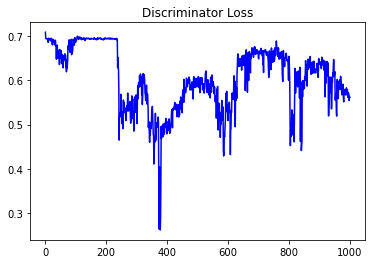

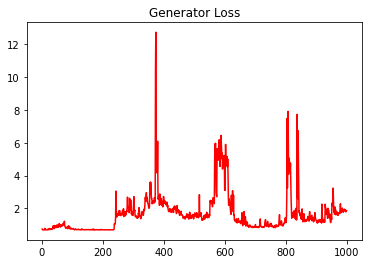

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.12742562231111837


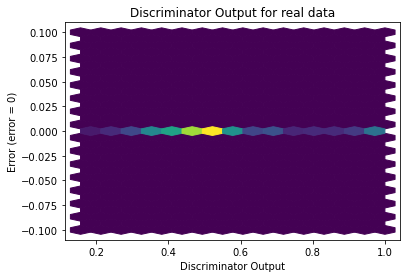

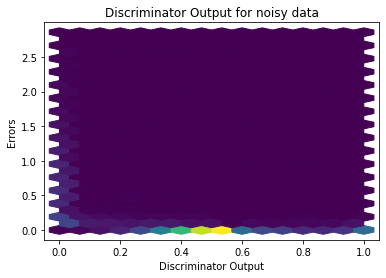

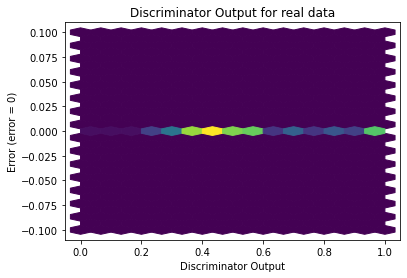

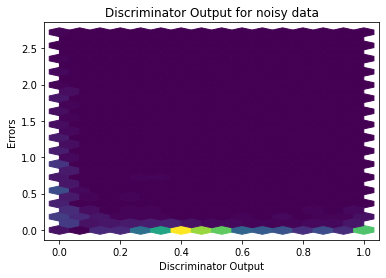

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

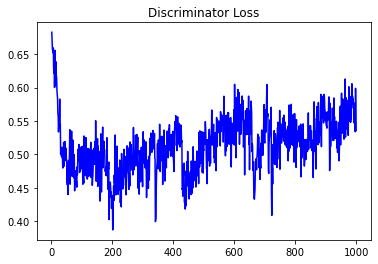

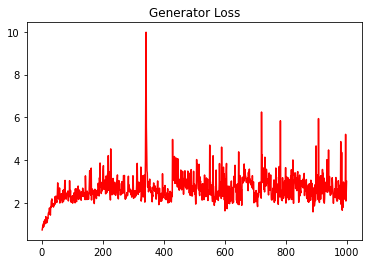

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.13429393004287374


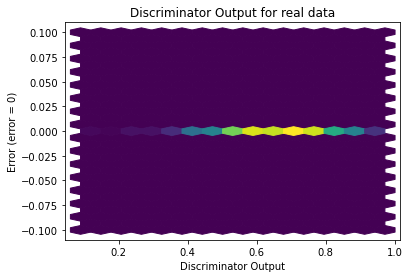

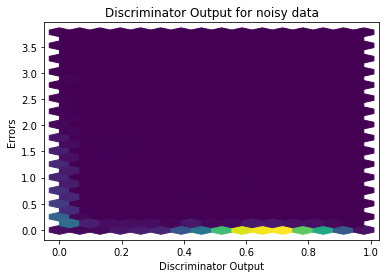

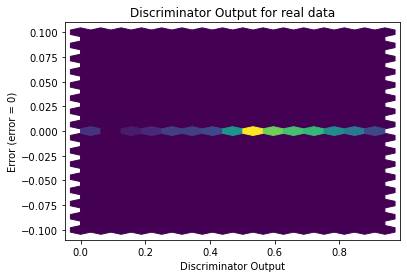

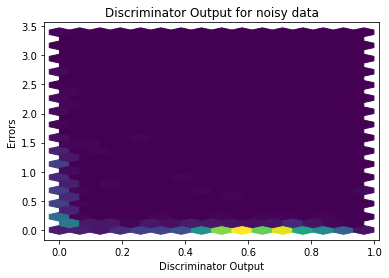

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


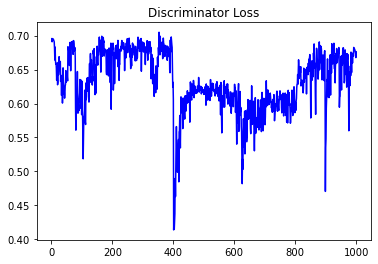

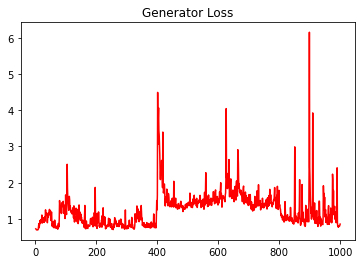

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.05978161931799894


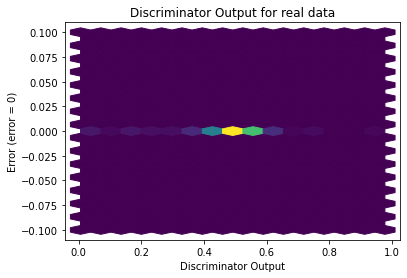

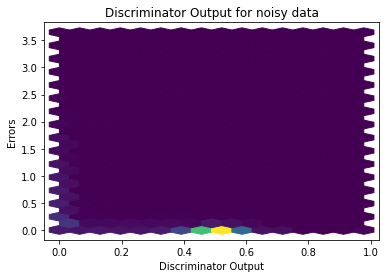

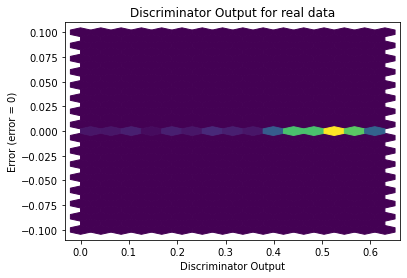

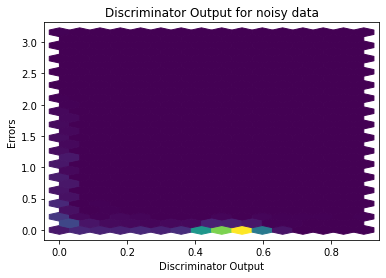

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


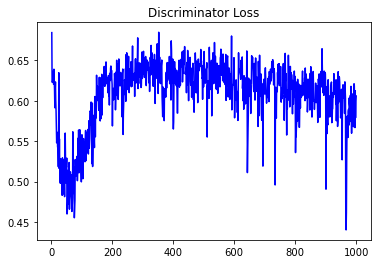

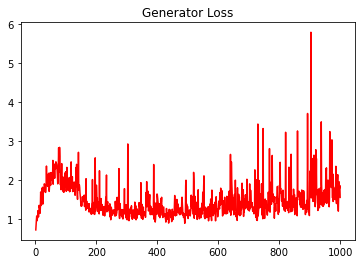

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.06933504388703929


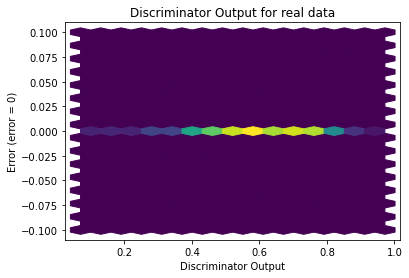

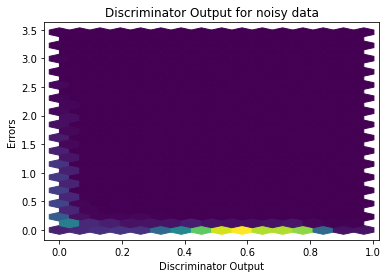

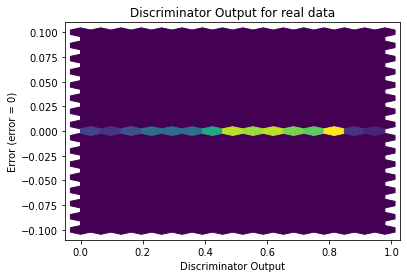

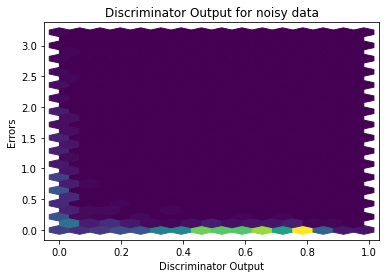

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9715]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9976]], requires_grad=True)
